In [21]:
import uproot
import matplotlib.pyplot as plt
import hist as h
import mplhep as hep
import numpy as np

In [38]:
data_dict = {
    "preID": {
        "bkg": {
            "test": "roots_preID/ParkingBPH4_2018Atest_plots.root",
            "SR": "roots_preID/ParkingBPH4_2018ASR_plots.root",
            "OOT": "roots_preID/ParkingBPH4_2018AOOT_plots.root",
        },
        "sig": {
            "test": "roots_preID/BToKPhi_MuonLLPDecayGenFilter_PhiToPi0Pi0_mPhi0p3_ctau300test_plots.root",
            "SR": "roots_preID/BToKPhi_MuonLLPDecayGenFilter_PhiToPi0Pi0_mPhi0p3_ctau300SR_plots.root",
            "OOT": "roots_preID/BToKPhi_MuonLLPDecayGenFilter_PhiToPi0Pi0_mPhi0p3_ctau300OOT_plots.root",
        }
    },
    "postID": {
        "bkg": {
            "test": "roots_postID/ParkingBPH4_2018Atest_plots.root",
            "SR": "roots_postID/ParkingBPH4_2018ASR_plots.root",
            "OOT": "roots_postID/ParkingBPH4_2018AOOT_plots.root",
        },
        "sig": {
            "test": "roots_postID/BToKPhi_MuonLLPDecayGenFilter_PhiToPi0Pi0_mPhi0p3_ctau300test_plots.root",
            "SR": "roots_postID/BToKPhi_MuonLLPDecayGenFilter_PhiToPi0Pi0_mPhi0p3_ctau300SR_plots.root",
            "OOT": "roots_postID/BToKPhi_MuonLLPDecayGenFilter_PhiToPi0Pi0_mPhi0p3_ctau300OOT_plots.root",
        }
    }
}

/uscms/home/aaportel/nobackup/mamba/envs/bpllp/lib/python3.11/site-packages/mplhep/utils.py:240: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/uscms/home/aaportel/nobackup/mamba/envs/bpllp/lib/python3.11/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in scalar divide
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/uscms/home/aaportel/nobackup/mamba/envs/bpllp/lib/python3.11/site-packages/mplhep/utils.py:240: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/uscms/home/aaportel/nobackup/mamba/envs/bpllp/lib/python3.11/site-packages/mplhep/utils.py:242: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/uscms/home/aaportel/nobackup/mamba/envs/bpllp/lib/python3

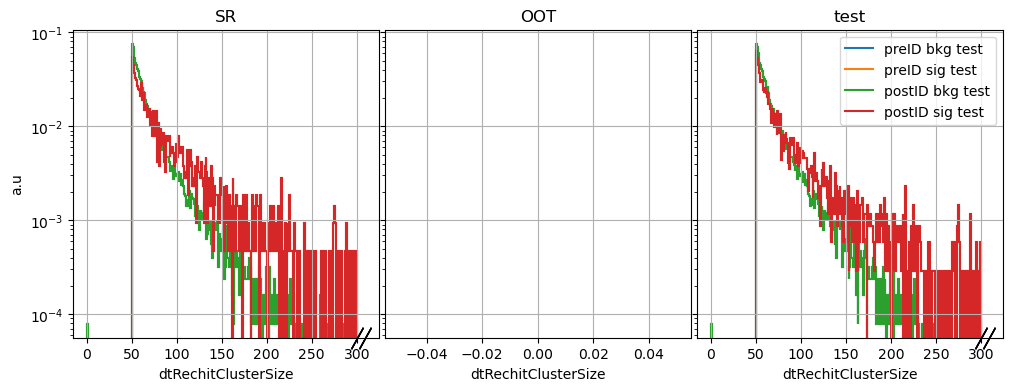

In [81]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), sharey=True)
regions = ['SR','OOT','test']
ax_dict = {region: ax for region, ax in zip(regions, ax)}


for ID in data_dict:
    for data_type in data_dict[ID]:
        for region in regions:
            with uproot.open(data_dict[ID][data_type][region]+':h_dtRechitClusterSize') as h:
                h = h.to_hist()
                hep.histplot(h, ax = ax_dict[region], density=True, yerr=False, label=f'{ID} {data_type} {region}')
                ax_dict[region].grid(True)
                ax_dict[region].set_xlabel('dtRechitClusterSize')
                ax_dict[region].set_title(region)

ax_dict['SR'].set_ylabel('a.u')
plt.yscale('log')
plt.legend()
plt.subplots_adjust(wspace=0.02)
plt.show()

In [3]:
r = uproot.open('roots/BToKPhi_MuonLLPDecayGenFilter_PhiToPi0Pi0_mPhi0p3_ctau300_tup.root')

In [5]:
r.keys()

['miniTree;3', 'miniTree;2']

In [27]:
r['miniTree;3']['dtRechitClusterEta'].values()

[]